In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
######### Paid Media #############

In [40]:
os.chdir('C:\\Users\\li.tan\\Downloads')
data = pd.read_excel('CPM data.xlsx')
data['CPM'] = data['Media Cost'] / data['Impressions'] * 1000
data.columns = ['Brand', 'Publisher', 'Site Category', 'Week', 'Media Cost', 'Impressions', 'CPM']
data = data[data['Brand'] != 'Default']

Text(0.5,1,'CPM by Brand')

<Figure size 432x288 with 0 Axes>

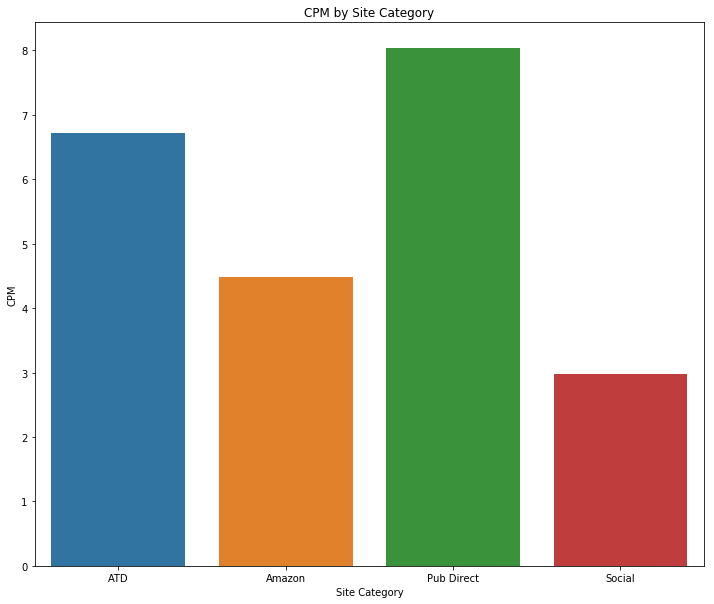

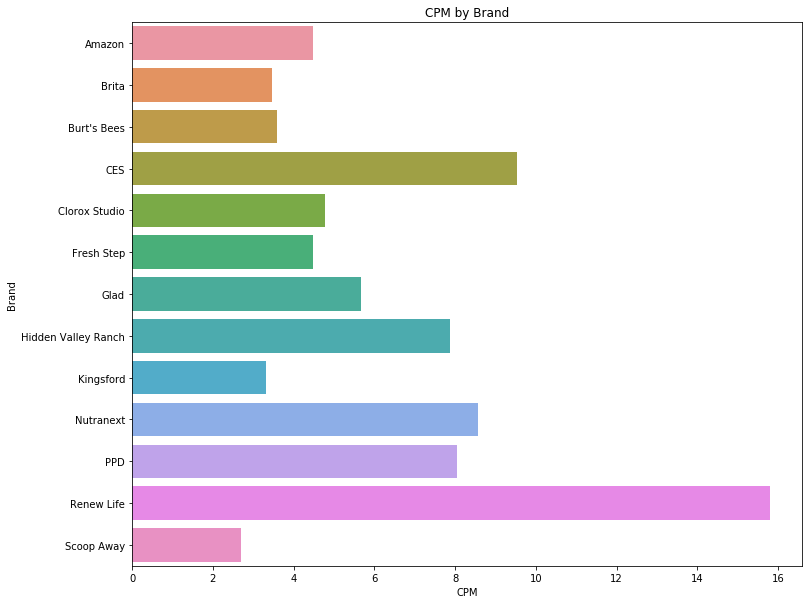

In [104]:
# Site Category and Brand level data
data_SC = data.groupby('Site Category', as_index = False).agg({'Media Cost': 'sum', 'Impressions':'sum'})
data_SC['CPM'] = data_SC['Media Cost'] / data_SC['Impressions'] * 1000
plt.figure(1)
plt.figure(figsize = (12,10))
sns.barplot(y = 'CPM', x = 'Site Category', data = data_SC)
plt.title('CPM by Site Category')

data_brand = data.groupby('Brand', as_index = False).agg({'Media Cost':'sum', 'Impressions':'sum'})
data_brand['CPM'] = data_brand['Media Cost'] / data_brand['Impressions'] * 1000
plt.figure(2)
plt.figure(figsize = (12,10))
sns.barplot(y = 'Brand', x = 'CPM', data = data_brand)
plt.title('CPM by Brand')

# Insight
# Social and Amazon are more cost efficient than ATD and Pub Direct
# Brita, Burt's Bees, Kingsford and Scoop Away are more see lower CPMs than other brands

Text(0.5,1,'Overall trend by Brand')

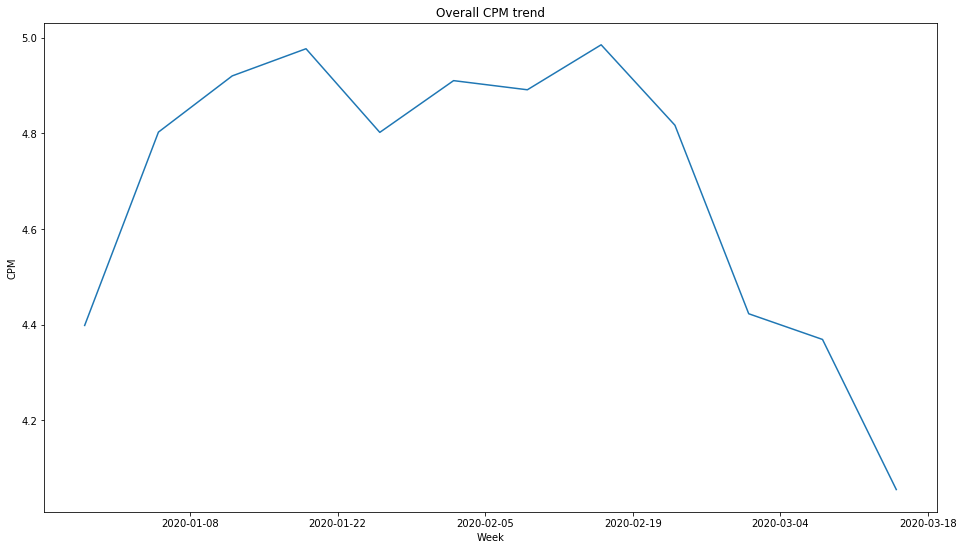

<Figure size 432x288 with 0 Axes>

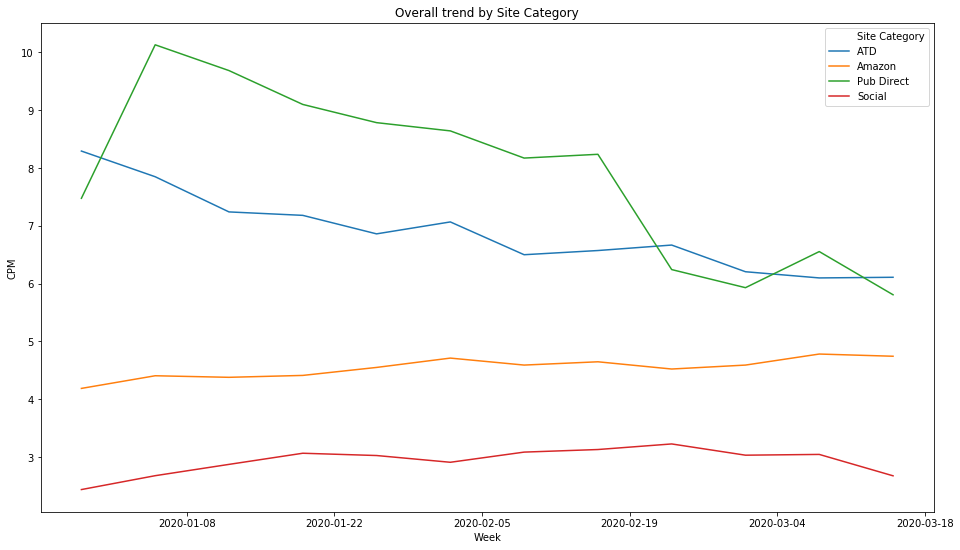

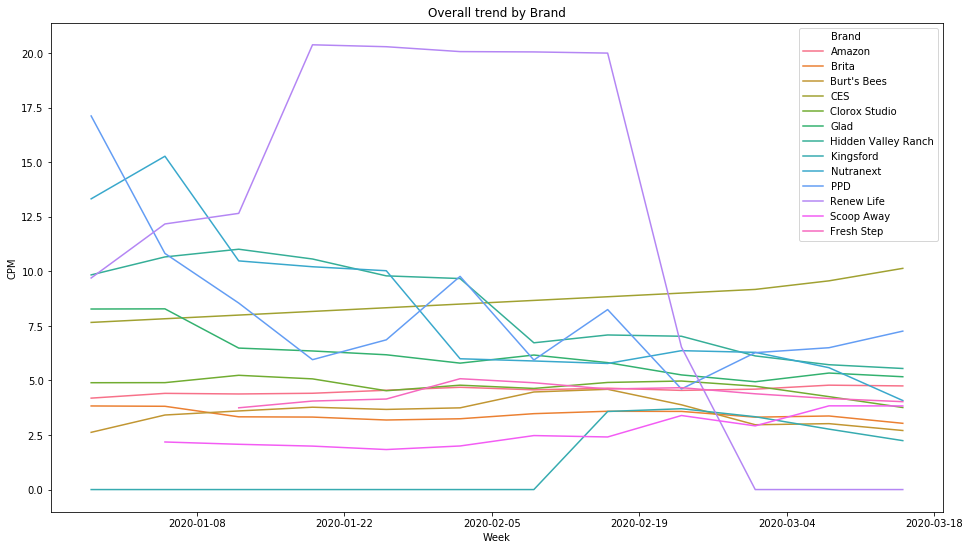

In [172]:
# CPM Trend
data_agg = data_trend_SC = data.groupby('Week', as_index = False).agg({'Media Cost':'sum', 'Impressions':'sum'})
data_trend_SC['CPM'] = data_trend_SC['Media Cost'] / data_trend_SC['Impressions'] * 1000
plt.figure(figsize = (16,9))
sns.lineplot(x = 'Week', y = 'CPM', data = data_trend_SC, ci = None)
plt.title('Overall CPM trend')

data_trend_SC = data.groupby(['Week','Site Category'], as_index = False).agg({'Media Cost':'sum', 'Impressions':'sum'})
data_trend_SC['CPM'] = data_trend_SC['Media Cost'] / data_trend_SC['Impressions'] * 1000
plt.figure(2)
plt.figure(figsize = (16,9))
sns.lineplot(x = 'Week', y = 'CPM', hue = 'Site Category', data = data_trend_SC, ci = None)
plt.title('Overall trend by Site Category')

data_trend_brand = data.groupby(['Week','Brand'], as_index = False).agg({'Media Cost':'sum', 'Impressions':'sum'})
data_trend_brand['CPM'] = data_trend_brand['Media Cost'] / data_trend_brand['Impressions'] * 1000
plt.figure(3)
plt.figure(figsize = (16,9))
sns.lineplot(x = 'Week', y = 'CPM', hue = 'Brand', data = data_trend_brand, ci = None)
plt.title('Overall trend by Brand')

# Insight
# Overall, CPM was high during Super Bowl days and started to dip afterward
# ATD and Pub direct CPMs are trending down while Social and Amazon are flat at a low level
# No clear trends by brand

In [ ]:
########## Paid Search ##########

In [174]:
search_data = pd.read_excel('Account - CPC-2020-03-16_Search_JFM.xlsx', sheetname = '(Data)')
search_data_agg = search_data.groupby('Day',as_index = False).agg({'Cost':'sum','Impr':'sum','Clicks':'sum'})
search_data_agg['CPM'] = search_data_agg['Cost'] / search_data_agg['Impr'] * 1000
search_data_agg['CPC'] = search_data_agg['Cost'] / search_data_agg['Clicks']

C:\Software\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Text(0.5,1,'Spend by Brand')

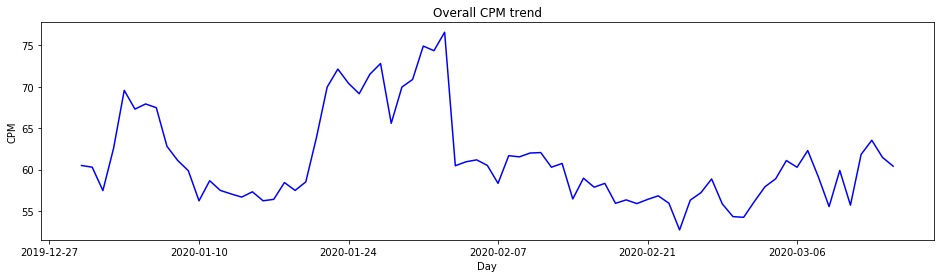

<Figure size 432x288 with 0 Axes>

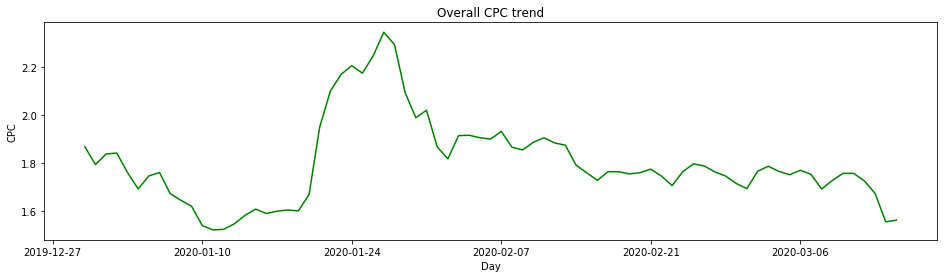

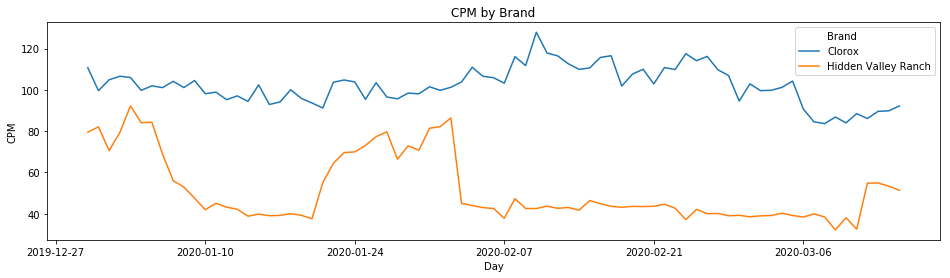

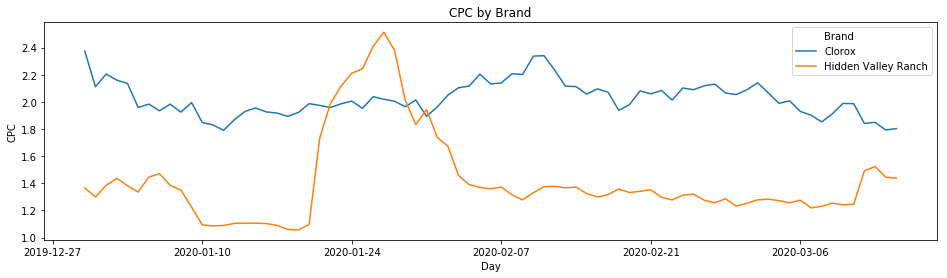

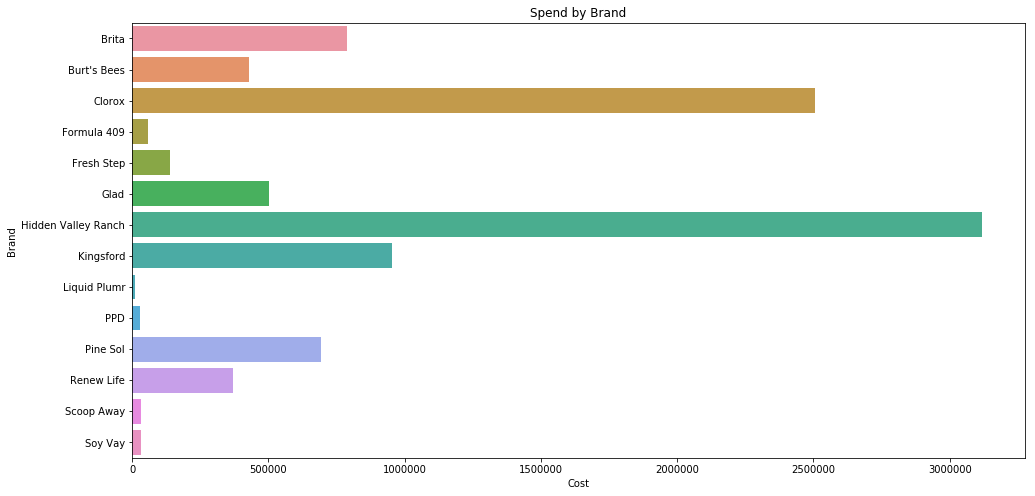

In [175]:
# CPM and CPC trend
plt.figure(figsize = (16,4))
sns.lineplot(x = 'Day', y = 'CPM', data = search_data_agg, color = 'blue')
plt.title('Overall CPM trend')
plt.figure(2)
plt.figure(figsize = (16,4))
sns.lineplot(x = 'Day', y = 'CPC', data = search_data_agg, color = 'green')
plt.title('Overall CPC trend')

Brand = []
for brand in search_data['Advertiser']:
    if brand.find('PPD') != -1:
        Brand.append('PPD')
    elif brand.find('Clorox') != -1:
        Brand.append('Clorox')
    elif brand.find('Tilex') != -1:
        Brand.append('Clorox')
    elif brand.find('Toilet') != -1:
        Brand.append('Clorox')
    elif brand.find('Kings') != -1:
        Brand.append('Kingsford')
    elif brand.find('Nutranext') != -1:
        Brand.append('Kingsford')
    elif brand.find('Pine') != -1:
        Brand.append('Pine Sol')
    else:
        Brand.append(brand)
search_data['Brand'] = Brand
search_data['CPM'] = search_data['Cost'] / search_data['Impr'] * 1000
search_data['CPC'] = search_data['Cost'] / search_data['Clicks']
data_plot = search_data.loc[search_data['Brand'].isin(['Clorox','Hidden Valley Ranch'])]
plt.figure(3)
plt.figure(figsize = (16,4))
sns.lineplot(x = 'Day', y = 'CPM', hue = 'Brand', data = data_plot, ci = None)
plt.title('CPM by Brand')

plt.figure(4)
plt.figure(figsize = (16,4))
sns.lineplot(x = 'Day', y = 'CPC', hue = 'Brand', data = data_plot, ci = None)
plt.title('CPC by Brand')

search_data_agg = search_data.groupby('Brand',as_index = False).agg({'Cost':'sum','Impr':'sum','Clicks':'sum'})
search_data_agg['CPM'] = search_data_agg['Cost'] / search_data_agg['Impr'] * 1000
search_data_agg['CPC'] = search_data_agg['Cost'] / search_data_agg['Clicks']
plt.figure(figsize = (16,8))
sns.barplot(x = 'Cost', y = 'Brand', data = search_data_agg)
plt.title('Spend by Brand')

# Insight
# Both CPM and CPC peaked around end of Jan and started to trend down
# Due to the size of Media Cost, HVR and Clorox are dominating the trend of overall CPM and CPC
# HVR increased spend during Super Bowl, that's why the cost stands out across all brands

In [119]:
# This section is for t test, the purpose is not driving insights, but validating some insights

from scipy import stats

def t_test(a, b, N):
    var_a = a.var(ddof=1)
    var_b = b.var(ddof=1)
    s = np.sqrt((var_a+var_b)/2)
    t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
    df = 2*N-2
    p = 1-stats.t.cdf(t,df=df)
    return (p)

In [120]:
# T test on CPM by Site Category
t_test_data = data.groupby(['Week','Site Category'],as_index = False).agg({'Media Cost':'sum','Impressions':'sum'})
t_test_data['CPM'] = t_test_data['Media Cost'] / t_test_data['Impressions']
t_test_ATD = t_test_data[t_test_data['Site Category'] == 'ATD']
t_test_Social = t_test_data[t_test_data['Site Category'] == 'Social']
t_test_Amazon = t_test_data[t_test_data['Site Category'] == 'Amazon']
t_test_PD = t_test_data[t_test_data['Site Category'] == 'Pub Direct']

In [123]:
p1 = t_test(t_test_Amazon['CPM'],t_test_Social['CPM'],12)
p1

1.2212453270876722e-15